In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv("D:\Projects\Dataset\student_exam_scores.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ACER\AppData\Local\Temp\ipykernel_19152\3331902550.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Projects\Dataset\student_exam_scores.csv")


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [4]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


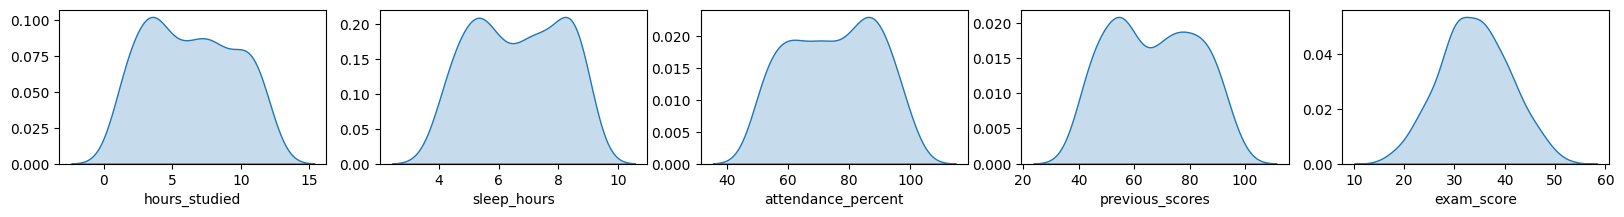

In [5]:
df_num_col = df.columns
df_num_col = df_num_col[1::]
n = 1

plt.figure(figsize=(20,2))
for col in df_num_col:
    ax = plt.subplot(1,5,n)   
    sns.kdeplot(df[col], label=col, fill=True)
    ax.set_ylabel("")

    n += 1
    

plt.show()

##### All the distribuitions are normally distributed.....no skewness.....means no outliers present.....still we would also be checking boxplots for assurance

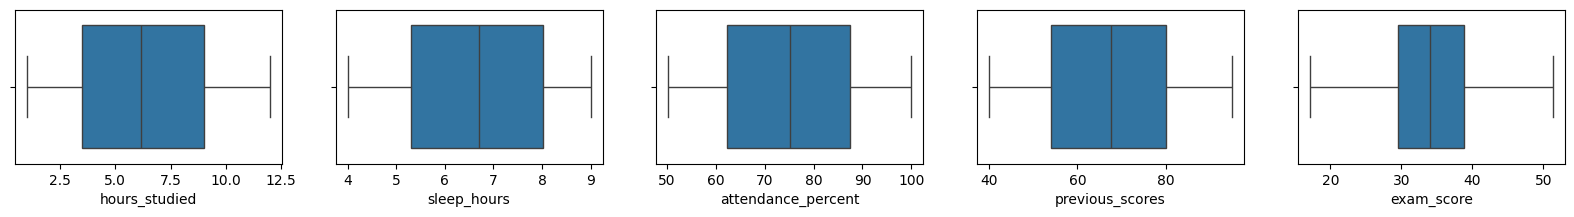

In [6]:
df_num_col = df.columns
df_num_col = df_num_col[1::]
n = 1

plt.figure(figsize=(20,2))
for col in df_num_col:
    ax = plt.subplot(1,5,n)   
    sns.boxplot(x = df[col])
    ax.set_ylabel("")

    n += 1
    

plt.show()

##### As no null values and outliers present we will be continuing to the next part skipping any data preprocessing

## Correlation Check

<Axes: >

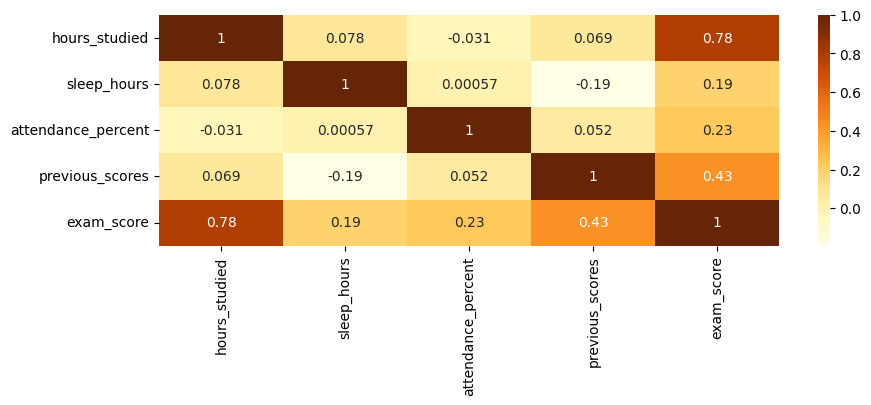

In [7]:
df_numeric = df.select_dtypes(include = "number")
plt.figure(figsize=(10,3))
sns.heatmap(df_numeric.corr(), annot = True, cmap = "YlOrBr")

##### It seems only "hours_studied" has the highest positive correlation of 0.78 with exam_score(Target).....and "previous_scores" do have a mediocre correlation of 0.43

## Relationship Plot

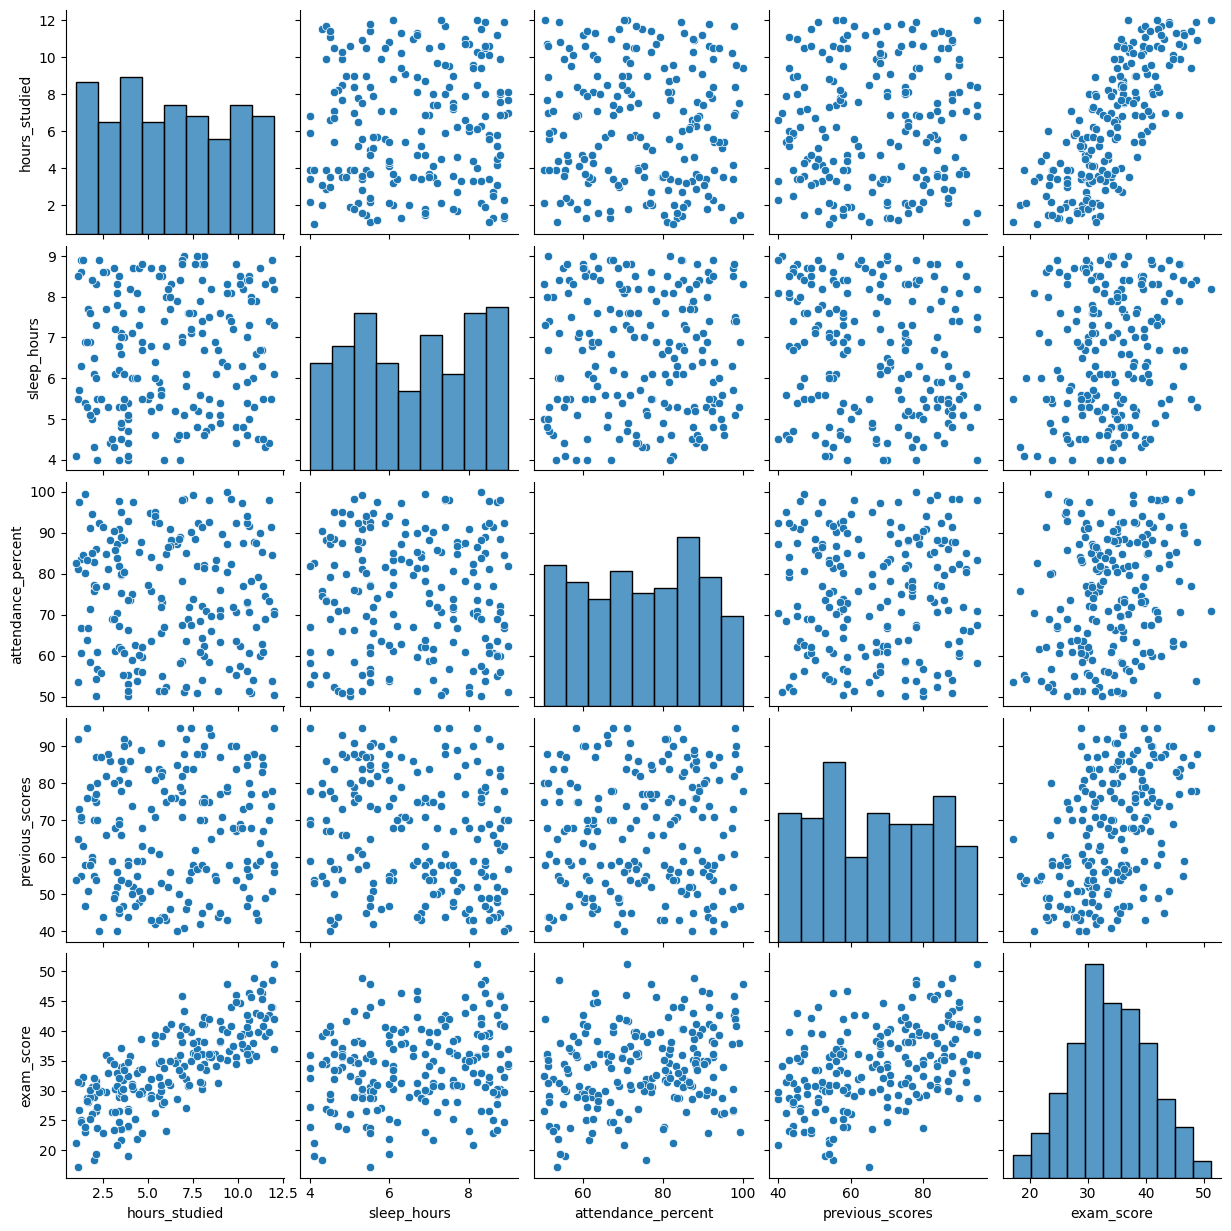

In [8]:
sns.pairplot(df)

##### The relationship of different features with target seems to have some linearity("hours_studied" being the most)..........Let's build a linear model first

###### Before we head towards modeling let's first remove the unnecessary columns.....in here it is student_id.....so we're going to remove this column

In [9]:
df = df.drop("student_id", axis=1)

In [10]:
df.head(3)

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8


##### Now let's import Linear Regression and start building our first model

In [11]:
X = df.loc[:, df.columns != "exam_score"]
y = df["exam_score"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 15, random_state = 100)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("R2_value: ", r2_score(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred)*100)

RMSE:  2.330443923829035
R2_value:  0.8975790473700824
MAPE:  5.619181370969444


#### so we are having r^2 value of 89.75%........ but we can not rely on it......let's check for over fitting

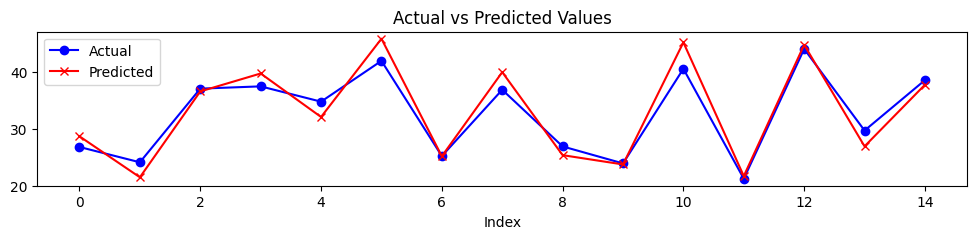

In [15]:
plt.figure(figsize=(12,2))

plt.plot(y_test.values, label="Actual", color="blue", marker="o")
plt.plot(y_pred, label="Predicted", color="red", marker="x")

plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.legend()
plt.show()

# Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score, KFold

In [17]:
# set up 5 fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state = 100)

In [18]:
score = cross_val_score(model, X, y, cv=kfold, scoring="r2")

In [19]:
print("Cross_Validation Score", score)

Cross_Validation Score [0.82052751 0.83375285 0.81171974 0.80373575 0.85002089]


In [20]:
print("Mean r2: ", np.mean(score))
print("Std: ", np.std(score))

Mean r2:  0.8239513480969827
Std:  0.016405459939707993


### After cross validation it has come down to 82.39%....... Let's see if we can optimize a little

# Model Optimization

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor(n_estimators=200, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=100)

In [23]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

In [24]:
# Put into a nice dataframe
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance_df)

              Feature  Importance
0       hours_studied    0.667414
3     previous_scores    0.165453
2  attendance_percent    0.099027
1         sleep_hours    0.068105


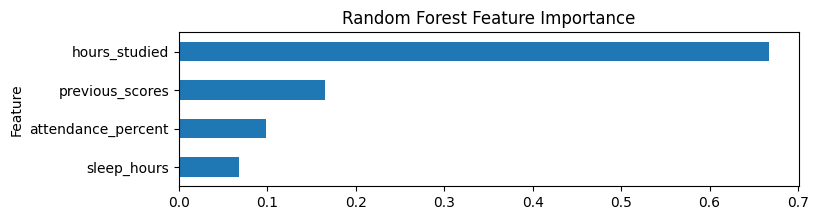

In [25]:
feat_importance_df.plot(
    kind='barh', x='Feature', y='Importance',
    figsize=(8,2), legend=False
)
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.show()

In [26]:
X = df.drop(columns=["exam_score"])
y = df["exam_score"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=15, random_state=100)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

In [28]:
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("R2_value: ", r2_score(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred)*100)

RMSE:  2.330443923829035
R2_value:  0.8975790473700824
MAPE:  5.619181370969444


In [29]:
# set up 5 fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state = 100)
score = cross_val_score(model, X, y, cv=kfold, scoring="r2")

print("Cross_Validation Score", score)
print("Mean r2: ", np.mean(score))
print("Std: ", np.std(score))

Cross_Validation Score [0.82052751 0.83375285 0.81171974 0.80373575 0.85002089]
Mean r2:  0.8239513480969827
Std:  0.016405459939707993


### Removing features are not making the model better........ Let's finalize the model with 82.39% accuracy.......It's not bad though for exam marks prediction

## Final Model

In [30]:
# Lts's build the final model as I am satisfied with 82% accuracy

In [31]:
# Final Model using full data set
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [32]:
#### Saving the model
import joblib
joblib.dump(final_model, "students_marks.pkl")

['students_marks.pkl']

In [33]:
# Creating a data frame for testing the model
X_new = pd.DataFrame({
'hours_studied': [1,6,8],
'sleep_hours': [10,8,10],
'attendance_percent': [90,70,80],
'previous_scores': [90,90,90]})

In [34]:
loaded_model = joblib.load("students_marks.pkl")

In [35]:
y_pred = loaded_model.predict(X_new)

In [36]:
print(y_pred) # checking for the answers only

[34.64647317 38.35045799 44.44939224]
